In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import string
import re
from collections import Counter
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.api.types import is_string_dtype, is_numeric_dtype    
plt.style.use('ggplot')




Bad key "backend.qt4" on line 43 in
/etc/matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import chardet
with open('test.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [25]:
df_completo = pd.read_csv("test.csv",";")
df_completo.drop(['Unnamed: 0'], axis=1, inplace=True)
print(df_completo.shape)
df_completo.head(3)

(12308, 16)


,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,barrio_aumentado
0,44678,1/4/2021,15/4/2021,1/4/2021,"-34,6274551","-58,4256599",boedo,2.0,1.0,1.0,35.0,32.0,NaN,departamento - boedo,departamento 2 ambientes con piscina/terraza/s...,boedo
1,44679,1/4/2021,15/4/2021,1/4/2021,"-34,5728929","-58,4781891",villa urquiza,1.0,NaN,1.0,45.0,45.0,NaN,departamento - villa urquiza,ole. corredor silvia serrano cpi 3809<br>venta...,villaurquiza
2,44680,1/4/2021,15/4/2021,1/4/2021,"-34,5381138","-58,4654894",nuñez,2.0,1.0,2.0,61.0,61.0,NaN,departamento muy buen departamento en edificio...,excelente departamento en edificio de categorí...,nunez


In [26]:
df_completo['description'] = df_completo['description'].str.replace("baño","banio")
df_completo['description'] = df_completo['description'].str.replace("balcón","balcon")
df_completo['description'] = df_completo['description'].str.replace("balcã³n","balcon")


df_completo['description'] = df_completo['description'].str.replace("antigüedad","antiguedad")
df_completo['description'] = df_completo['description'].str.replace("años","anios")
df_completo['description'] = df_completo['description'].str.replace("año","anio")
df_completo['description'] = df_completo['description'].str.replace("dúplex","duplex")
df_completo['description'] = df_completo['description'].str.replace("baã±o","banio")
df_completo['description'] = df_completo['description'].str.replace("agã¼ero","aguero")
df_completo['description'] = df_completo['description'].str.replace("pueyrredã³n","pueyrredon")
df_completo['description'] = df_completo['description'].str.replace("mã¡s","mas")
df_completo['description'] = df_completo['description'].str.replace("despuã©s","despues")


df_completo['barrio_aumentado'] = df_completo['barrio_aumentado'].str.replace("las caÃ±itas","palermo")
df_completo['barrio_aumentado'] = df_completo['barrio_aumentado'].str.replace("centro / microcentro","san nicolas")
df_completo['barrio_aumentado'] = df_completo['barrio_aumentado'].str.replace("tribunales","san nicolas")
df_completo['barrio_aumentado'] = df_completo['barrio_aumentado'].str.replace("abasto","balvanera")
df_completo['barrio_aumentado'] = df_completo['barrio_aumentado'].str.replace("congreso","balvanera")
df_completo['barrio_aumentado'] = df_completo['barrio_aumentado'].str.replace("once","balvanera")
df_completo['barrio_aumentado'] = df_completo['barrio_aumentado'].str.replace("parque centenario","caballito")
df_completo['barrio_aumentado'] = df_completo['barrio_aumentado'].str.replace("san nicolÃ¡s","san nicolas")
df_completo['barrio_aumentado'] = df_completo['barrio_aumentado'].str.replace("villa gral. mitre","villa gral mitre")
df_completo['barrio_aumentado'] = df_completo['barrio_aumentado'].str.replace('san nicolás',"sannicolas")
df_completo['barrio_aumentado'] = df_completo['barrio_aumentado'].str.replace('nuñez',"nunez")
df_completo['barrio_aumentado'] = df_completo['barrio_aumentado'].str.replace('sannicolás','sannicolas')
df_completo['barrio_aumentado'] = df_completo['barrio_aumentado'].str.replace('constitución','constitucion')

df_completo["barrio_aumentado"] = df_completo["barrio_aumentado"].str.replace(" ", "")




In [27]:
df_completo.drop(['start_date', 'end_date', 'created_on','l3','lat','lon'], axis = 1, inplace = True)
df_completo.rename({'barrio_aumentado': 'barrio'}, axis=1, inplace=True)

In [28]:
wrong_surface_rows = df_completo[df_completo['surface_total']<df_completo['surface_covered']]
wrong_surface_rows.shape

(34, 10)

In [29]:
df_completo.at[wrong_surface_rows.index, 'surface_total'] = wrong_surface_rows.surface_covered
df_completo.at[wrong_surface_rows.index, 'surface_covered'] = wrong_surface_rows.surface_total

In [30]:
wrong_bathrooms_rows = df_completo[df_completo['bathrooms'].isnull()]
wrong_bathrooms_rows.shape

(271, 10)

In [31]:
df_completo.at[wrong_bathrooms_rows.index, 'bathrooms'] = 1

In [32]:
wrong_room_rows = df_completo[df_completo['bathrooms'] > 8]
df_completo.at[wrong_room_rows.index, 'bathrooms'] = np.NaN

In [33]:
wrong_sup_total_rows = df_completo[df_completo['surface_total'] >  900]
df_completo.at[wrong_sup_total_rows.index, 'surface_total'] = np.NaN

In [34]:
df_completo['surface_total'].describe()

count    7608.000000
mean       87.379995
std        75.260963
min        12.000000
25%        44.000000
50%        63.000000
75%        99.000000
max       750.000000
Name: surface_total, dtype: float64

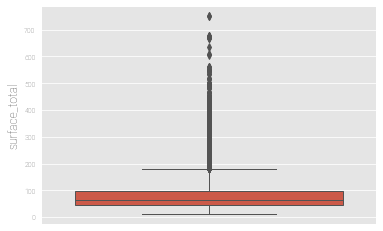

In [35]:
sns.boxplot(y = df_completo['surface_total'])

In [36]:
df_completo['surface_covered'].describe()

count    8267.000000
mean       78.413572
std        67.740254
min        10.000000
25%        40.000000
50%        57.000000
75%        87.000000
max       750.000000
Name: surface_covered, dtype: float64

In [37]:
wrong_sup_cov_rows = df_completo[df_completo['surface_covered'] < 15]
df_completo.at[wrong_sup_cov_rows.index, 'surface_covered'] = np.NaN

In [38]:
df_completo.columns

Index(['id', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'title', 'description', 'barrio'],
      dtype='object')

In [39]:
## Se imputa usando vecinos cercanos
import numpy as np
from sklearn.impute import KNNImputer

df_columns = df_completo[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]

imputer = KNNImputer(n_neighbors=4)
df_columns = imputer.fit_transform(df_columns)
df_completo['rooms_imp'] = df_columns[:,0].tolist()
df_completo['bedrooms_imp'] = df_columns[:,1].tolist()
df_completo['bathrooms_imp'] = df_columns[:,2].tolist()
df_completo['surface_total_imp'] = df_columns[:,3].tolist()
df_completo['surface_covered_imp'] = df_columns[:,4].tolist()

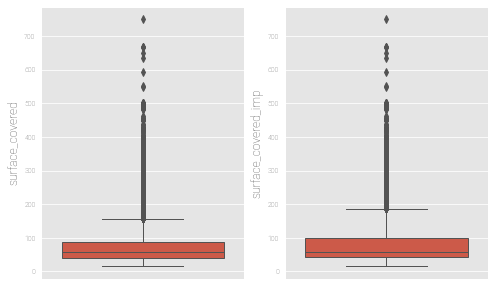

In [40]:
plt.subplots(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y = df_completo['surface_covered'])

plt.subplot(1, 2, 2)
sns.boxplot(y = df_completo['surface_covered_imp'])

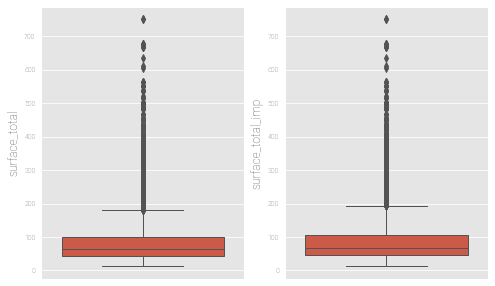

In [41]:
plt.subplots(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y = df_completo['surface_total'])

plt.subplot(1, 2, 2)
sns.boxplot(y = df_completo['surface_total_imp'])

In [42]:
for var in ['surface_covered_imp']:
    scaled_var = "scaled_surface_covered"
    df_completo[scaled_var] = np.log1p(df_completo[var])

In [43]:
df_completo.drop(['bathrooms_imp','bedrooms_imp','rooms_imp','rooms', 'bedrooms', 'surface_total','surface_covered','surface_total_imp','surface_covered_imp'], axis = 1, inplace = True)

Datos faltantes
id                            0
bathrooms                     0
price                     12308
title                         0
description                   0
barrio                        0
scaled_surface_covered        0
dtype: int64


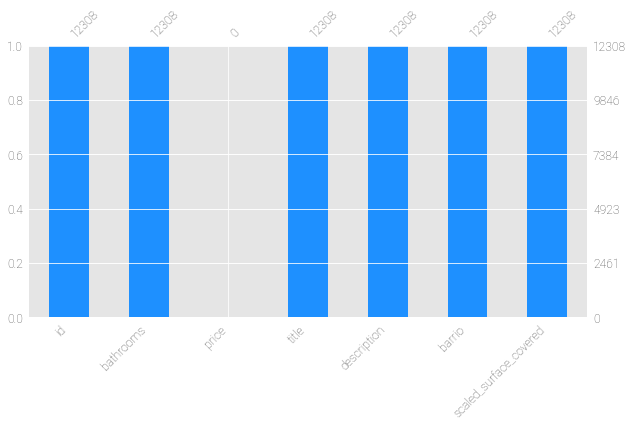

In [44]:
print("Datos faltantes")
print(df_completo.isnull().sum())
plt.style.use('ggplot')
msno.bar(df_completo, figsize=(10,5), color="dodgerblue", fontsize=12)

In [45]:
from nltk import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
stop_words = list(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /home/cdsw/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/cdsw/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''
    
    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Eliminación de saltos
    nuevo_texto = re.sub("br", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
        
    return(nuevo_texto)


In [47]:
df_filtered = df_completo.reset_index(drop = True)
df_filtered.head(3)

,id,bathrooms,price,title,description,barrio,scaled_surface_covered
0,44678,1.0,NaN,departamento - boedo,departamento 2 ambientes con piscina/terraza/s...,boedo,3.496508
1,44679,1.0,NaN,departamento - villa urquiza,ole. corredor silvia serrano cpi 3809<br>venta...,villaurquiza,3.828641
2,44680,2.0,NaN,departamento muy buen departamento en edificio...,excelente departamento en edificio de categorí...,nunez,4.127134


In [48]:
df_temp = pd.DataFrame()
for i in range(0,df_filtered.shape[0]):
    test = df_filtered['description'][i]
    text1 = limpiar_tokenizar(texto=test)
    salida = [x for x in text1 if x not in stop_words]
    if any(word in salida for word in ['amoblado']):
        amoblado = "SI"
    else:
        amoblado = "NO"
        
    if any(word in salida for word in ['patio']):
        patio = "SI"
    else:
        patio = "NO"
        
    if any(word in salida for word in ['terraza']):
        terraza = "SI"
    else:
        terraza = "NO"
    if any(word in salida for word in ['jardin']):
        jardin = "SI"
    else:
        jardin = "NO"    
    data = {'texto':test, 'texto_tokenizado':[salida],'amoblado': amoblado,'patio':patio,'terraza':terraza ,'jardin':jardin}
    new_row = pd.DataFrame(data)
    df_temp = df_temp.append(new_row)

In [49]:
df_temp.reset_index(inplace = True)

In [50]:
result = pd.concat([df_filtered, df_temp['amoblado'], df_temp['jardin'], df_temp['patio'], df_temp['terraza']], axis=1)

In [51]:
print(result.shape)
result.tail(3)

(12308, 11)


,id,bathrooms,price,title,description,barrio,scaled_surface_covered,amoblado,jardin,patio,terraza
12305,56983,1.0,NaN,departamento - paternal,descripción<br>semi piso 4 piso al frente<br>3...,paternal,4.276666,NO,NO,NO,SI
12306,56984,1.0,NaN,departamento - palermo,<br>departamento de 2 ambientes en inmejorable...,recoleta,3.891820,NO,NO,NO,NO
12307,56985,1.0,NaN,belgrano - venta 2 amb - full amenities - a ...,* ante cualquier consulta comunicarse al 11 <b...,belgrano,3.871201,SI,NO,NO,NO


In [52]:
df_temp = pd.DataFrame()
for i in range(0,result.shape[0]):
    test = result['description'][i]
    text1 = limpiar_tokenizar(texto=test)
    salida = [x for x in text1 if x not in stop_words]
    if any(word in salida for word in ['acondicionado']):
        acond = "SI"
    else:
        acond = "NO"
        
    if any(word in salida for word in ['mascotas','mascota']):
        mascota = "SI"
    else:
        mascota = "NO"
        
    if any(word in salida for word in ['balcon']):
        balcon = "SI"
    else:
        balcon = "NO"
    
    data = {'texto':test, 'texto_tokenizado':[salida],'aire_acond': acond,'mascota':mascota,'balcon':balcon}
    new_row = pd.DataFrame(data)
    df_temp = df_temp.append(new_row)

In [53]:
df_temp.reset_index(inplace = True)
result_c2 = pd.concat([result, df_temp['aire_acond'], df_temp['mascota'], df_temp['balcon']], axis=1)

In [54]:
print(result_c2.shape)
result_c2.tail(3)

(12308, 14)


,id,bathrooms,price,title,description,barrio,scaled_surface_covered,amoblado,jardin,patio,terraza,aire_acond,mascota,balcon
12305,56983,1.0,NaN,departamento - paternal,descripción<br>semi piso 4 piso al frente<br>3...,paternal,4.276666,NO,NO,NO,SI,SI,NO,SI
12306,56984,1.0,NaN,departamento - palermo,<br>departamento de 2 ambientes en inmejorable...,recoleta,3.891820,NO,NO,NO,NO,NO,NO,NO
12307,56985,1.0,NaN,belgrano - venta 2 amb - full amenities - a ...,* ante cualquier consulta comunicarse al 11 <b...,belgrano,3.871201,SI,NO,NO,NO,NO,NO,NO


In [55]:
df_temp = pd.DataFrame()
for i in range(0,result.shape[0]):
    test = result['description'][i]
    text1 = limpiar_tokenizar(texto=test)
    salida = [x for x in text1 if x not in stop_words]
    
    if any(word in salida for word in ['pileta','piscina']):
        pileta = "SI"
    else:
        pileta = "NO"
    if any(word in salida for word in ['cochera','cocheras']):
        cochera = "SI"
    else:
        cochera = "NO"
    if any(word in salida for word in ['laundry']):
        laundry = "SI"
    else:
        laundry = "NO"
        
    if any(word in salida for word in ['SUM','sum']):
        summ = "SI"
    else:
        summ = "NO"
    data = {'texto':test, 'texto_tokenizado':[salida],'pileta':pileta,'cochera':cochera,'laundry':laundry,'summ':summ}
    new_row = pd.DataFrame(data)
    df_temp = df_temp.append(new_row)

In [56]:
df_temp.reset_index(inplace = True)
result_c3 = pd.concat([result_c2, df_temp['pileta'], df_temp['cochera'], df_temp['laundry'], df_temp['summ']], axis=1)

In [57]:
print(result_c3.shape)
result_c3.tail(3)

(12308, 18)


,id,bathrooms,price,title,description,barrio,scaled_surface_covered,amoblado,jardin,patio,terraza,aire_acond,mascota,balcon,pileta,cochera,laundry,summ
12305,56983,1.0,NaN,departamento - paternal,descripción<br>semi piso 4 piso al frente<br>3...,paternal,4.276666,NO,NO,NO,SI,SI,NO,SI,NO,SI,NO,NO
12306,56984,1.0,NaN,departamento - palermo,<br>departamento de 2 ambientes en inmejorable...,recoleta,3.891820,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
12307,56985,1.0,NaN,belgrano - venta 2 amb - full amenities - a ...,* ante cualquier consulta comunicarse al 11 <b...,belgrano,3.871201,SI,NO,NO,NO,NO,NO,NO,SI,SI,NO,NO


In [58]:
df_temp = pd.DataFrame()
for i in range(0,result.shape[0]):
    test = result['description'][i]
    text1 = limpiar_tokenizar(texto=test)
    salida = [x for x in text1 if x not in stop_words]
    
    if any(word in salida for word in ['amenities']):
        amenities = "SI"
    else:
        amenities = "NO"
    if any(word in salida for word in ['estrenar']):
        estrenar = "SI"
    else:
        estrenar = "NO"
    if any(word in salida for word in ['ascensor']):
        ascensor = "SI"
    else:
        ascensor = "NO"

        
    data = {'texto':test, 'texto_tokenizado':[salida],'amenities':amenities,'estrenar':estrenar,'ascensor':ascensor}
    new_row = pd.DataFrame(data)
    df_temp = df_temp.append(new_row)

In [59]:
df_temp.reset_index(inplace = True)
result_c4 = pd.concat([result_c3, df_temp['amenities'], df_temp['estrenar'], df_temp['ascensor']], axis=1)

In [60]:
print(result_c4.shape)
result_c4.tail(3)

(12308, 21)


,id,bathrooms,price,title,description,barrio,scaled_surface_covered,amoblado,jardin,patio,...,aire_acond,mascota,balcon,pileta,cochera,laundry,summ,amenities,estrenar,ascensor
12305,56983,1.0,NaN,departamento - paternal,descripción<br>semi piso 4 piso al frente<br>3...,paternal,4.276666,NO,NO,NO,...,SI,NO,SI,NO,SI,NO,NO,NO,NO,NO
12306,56984,1.0,NaN,departamento - palermo,<br>departamento de 2 ambientes en inmejorable...,recoleta,3.891820,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
12307,56985,1.0,NaN,belgrano - venta 2 amb - full amenities - a ...,* ante cualquier consulta comunicarse al 11 <b...,belgrano,3.871201,SI,NO,NO,...,NO,NO,NO,SI,SI,NO,NO,SI,NO,NO


In [61]:
df_temp = pd.DataFrame()
for i in range(0,result.shape[0]):
    test = result['description'][i]
    text1 = limpiar_tokenizar(texto=test)
    salida = [x for x in text1 if x not in stop_words]
    
    if any(word in salida for word in ['contrafrente']):
        c_frente = "SI"
    else:
        c_frente = "NO"
    if any(word in salida for word in ['frente']):
        frente = "SI"
    else:
        frente = "NO"
    if any(word in salida for word in ['luminoso','luminosa']):
        luminoso = "SI"
    else:
        luminoso = "NO"

        
    data = {'texto':test, 'texto_tokenizado':[salida],'contrafrente':c_frente,'frente':frente,'luminoso':luminoso}
    new_row = pd.DataFrame(data)
    df_temp = df_temp.append(new_row)

In [62]:
df_temp.reset_index(inplace = True)
result_c5 = pd.concat([result_c4, df_temp['contrafrente'], df_temp['frente'], df_temp['luminoso']], axis=1)

In [64]:
print(result_c5.shape)
result_c5.tail(3)

(12308, 24)


,id,bathrooms,price,title,description,barrio,scaled_surface_covered,amoblado,jardin,patio,...,pileta,cochera,laundry,summ,amenities,estrenar,ascensor,contrafrente,frente,luminoso
12305,56983,1.0,NaN,departamento - paternal,descripción<br>semi piso 4 piso al frente<br>3...,paternal,4.276666,NO,NO,NO,...,NO,SI,NO,NO,NO,NO,NO,NO,SI,NO
12306,56984,1.0,NaN,departamento - palermo,<br>departamento de 2 ambientes en inmejorable...,recoleta,3.891820,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
12307,56985,1.0,NaN,belgrano - venta 2 amb - full amenities - a ...,* ante cualquier consulta comunicarse al 11 <b...,belgrano,3.871201,SI,NO,NO,...,SI,SI,NO,NO,SI,NO,NO,NO,NO,NO


In [65]:
df_temp = pd.DataFrame()
for i in range(0,result.shape[0]):
    test = result['description'][i]
    text1 = limpiar_tokenizar(texto=test)
    salida = [x for x in text1 if x not in stop_words]
    
    if any(word in salida for word in ['ph']):
        ph = "SI"
    else:
        ph = "NO"
    if any(word in salida for word in ['duplex']):
        duplex = "SI"
    else:
        duplex = "NO"
    if any(word in salida for word in ['triplex']):
        triplex = "SI"
    else:
        triplex = "NO"
    if any(word in salida for word in ['casa','casas']):
        casa = "SI"
    else:
        casa = "NO"

        
    data = {'texto':test, 'texto_tokenizado':[salida],'ph':ph,'duplex':duplex,'triplex':triplex,'casa':casa}
    new_row = pd.DataFrame(data)
    df_temp = df_temp.append(new_row)

In [66]:
df_temp.reset_index(inplace = True)
result_c6 = pd.concat([result_c5, df_temp['ph'], df_temp['duplex'], df_temp['triplex'], df_temp['casa']], axis=1)

In [67]:
print(result_c6.shape)
result_c6.tail(3)

(12308, 28)


,id,bathrooms,price,title,description,barrio,scaled_surface_covered,amoblado,jardin,patio,...,amenities,estrenar,ascensor,contrafrente,frente,luminoso,ph,duplex,triplex,casa
12305,56983,1.0,NaN,departamento - paternal,descripción<br>semi piso 4 piso al frente<br>3...,paternal,4.276666,NO,NO,NO,...,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO
12306,56984,1.0,NaN,departamento - palermo,<br>departamento de 2 ambientes en inmejorable...,recoleta,3.891820,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
12307,56985,1.0,NaN,belgrano - venta 2 amb - full amenities - a ...,* ante cualquier consulta comunicarse al 11 <b...,belgrano,3.871201,SI,NO,NO,...,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO


In [80]:
df_modelo = result_c6.reset_index(drop=True)
df_modelo.head(3)

,id,bathrooms,price,title,description,barrio,scaled_surface_covered,amoblado,jardin,patio,...,amenities,estrenar,ascensor,contrafrente,frente,luminoso,ph,duplex,triplex,casa
0,44678,1.0,NaN,departamento - boedo,departamento 2 ambientes con piscina/terraza/s...,boedo,3.496508,NO,NO,NO,...,NO,NO,NO,SI,SI,NO,NO,NO,NO,NO
1,44679,1.0,NaN,departamento - villa urquiza,ole. corredor silvia serrano cpi 3809<br>venta...,villaurquiza,3.828641,NO,NO,NO,...,NO,NO,NO,NO,SI,SI,NO,NO,NO,NO
2,44680,2.0,NaN,departamento muy buen departamento en edificio...,excelente departamento en edificio de categorí...,nunez,4.127134,NO,NO,NO,...,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO


In [81]:
lst_cat = ['amoblado', 'jardin', 'patio', 'terraza', 'aire_acond', 'mascota',
       'balcon', 'pileta', 'cochera', 'laundry', 'summ', 'amenities',
       'estrenar', 'ascensor', 'contrafrente', 'frente', 'luminoso', 'ph',
       'duplex', 'triplex', 'casa']

for col in lst_cat:
    
    df_modelo[col] = df_modelo[col].astype('category')
    df_modelo[col] = df_modelo[col] .cat.codes
    

In [82]:
df_trenes = pd.read_csv("conteo_trenes.csv")
df_trenes.head()

,barrio_aumentado,n
0,palermo,3
1,belgrano,2
2,nunez,2
3,retiro,2
4,villasoldati,2


In [83]:
df_completo['estacion_tren'] = 0
for exp in range(0,df_trenes.shape[0]):
    estacion_tren_rows = df_modelo[df_modelo['barrio'] == df_trenes['barrio_aumentado'][exp]]
    df_modelo.at[estacion_tren_rows.index, 'estacion_tren'] = df_trenes['n'][exp]
df_completo.head(3)

,id,bathrooms,price,title,description,barrio,scaled_surface_covered,estacion_tren,expensas
0,44678,1.0,NaN,departamento - boedo,departamento 2 ambientes con piscina/terraza/s...,boedo,3.496508,0,NaN
1,44679,1.0,NaN,departamento - villa urquiza,ole. corredor silvia serrano cpi 3809<br>venta...,villaurquiza,3.828641,0,NaN
2,44680,2.0,NaN,departamento muy buen departamento en edificio...,excelente departamento en edificio de categorí...,nunez,4.127134,0,NaN


In [84]:
df_expensas = pd.read_csv("expensas.csv")
df_expensas['barrio'] = df_expensas['barrio'].str.lower()
df_expensas.barrio = df_expensas.barrio.str.replace(' ', '')
df_expensas.head()

,barrio,expensas
0,agronomia,2396.49
1,almagro,3652.52
2,balvanera,3477.26
3,barracas,3695.70
4,belgrano,4577.08


In [85]:
df_completo['expensas'] = np.NaN
for exp in range(0,df_expensas.shape[0]):
    expensas_rows = df_modelo[df_modelo['barrio'] == df_expensas['barrio'][exp]]
    df_modelo.at[expensas_rows.index, 'expensas'] = df_expensas['expensas'][exp]

In [86]:
df_modelo.dtypes

id                          int64
bathrooms                 float64
price                     float64
title                      object
description                object
barrio                     object
scaled_surface_covered    float64
amoblado                     int8
jardin                       int8
patio                        int8
terraza                      int8
aire_acond                   int8
mascota                      int8
balcon                       int8
pileta                       int8
cochera                      int8
laundry                      int8
summ                         int8
amenities                    int8
estrenar                     int8
ascensor                     int8
contrafrente                 int8
frente                       int8
luminoso                     int8
ph                           int8
duplex                       int8
triplex                      int8
casa                         int8
estacion_tren             float64
expensas      

In [87]:
lst_var = ['id','bathrooms',
 'scaled_surface_covered',
 'mascota',
 'pileta',
 'cochera',
 'amenities',
 'ph',
 'expensas']

df_modelo = df_modelo[lst_var]
df_modelo.head(3)

,id,bathrooms,scaled_surface_covered,mascota,pileta,cochera,amenities,ph,expensas
0,44678,1.0,3.496508,0,1,1,0,0,3354.07
1,44679,1.0,3.828641,0,0,1,0,0,3318.51
2,44680,2.0,4.127134,0,1,0,0,0,4326.89


In [88]:
df_modelo.to_csv("datos_para_test.csv")

### Para Kaggle

In [ ]:
subir_kaggle = pd.read_csv("datos_para_test.csv")
subir_kaggle.drop(['Unnamed: 0'], axis=1,inplace=True)

In [ ]:
al_modelo = subir_kaggle.copy()
al_modelo.drop(['id'], axis=1,inplace=True)
al_modelo.head(3)

In [ ]:
price_salida = np.expm1(best_grid.predict(al_modelo))
price_salida

In [ ]:
df = pd.DataFrame(data)
df

In [ ]:
plt.subplots(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y = round(np.expm1(y_test),2))

plt.subplot(1, 2, 2)
sns.boxplot(y = price_salida)

In [ ]:
df.to_csv("salida_a_kaggle.csv")